# The influence of COVID-19 cases on Canada Retail and Wholesales sales

## Junji Yu

Since the Covid-19 break out in Canada, I noticed that there are a lot of people in grocery stores, while the shopping malls like Richmond Center and Pacific Center have much less customers than before. It seems that people are more willing to go shopping for grocery rather than other goods. In this project, I will analyze the influence of Covid-19 on retail sales and wholesales sales from September 2019 to Octobor 2020 in a monthly basis.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import linear_model

## Part 1
First I will read the csv files of Covid-19 cases in Canada and make it into a table. This table contains province-level data and the number of confirmed cases, which is important for the following steps.

In [2]:
# Corona Virus Cases in Canada 

confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
ids = ["Province/State","Country/Region", "Lat","Long"]
confirmed=confirmed.melt(id_vars=ids, var_name="Date", value_name="cases")

covid = confirmed
covid["Date"] = pd.to_datetime(covid["Date"])
covid["Province/State"]=covid["Province/State"].fillna("")

covid_can = covid.groupby("Country/Region").get_group("Canada")

covid_can.sort_values(by=['Date'])

covid_can.head()

,Province/State,Country/Region,Lat,Long,Date,cases
39,Alberta,Canada,53.9333,-116.5765,2020-01-22,0
40,British Columbia,Canada,53.7267,-127.6476,2020-01-22,0
41,Diamond Princess,Canada,0.0000,0.0000,2020-01-22,0
42,Grand Princess,Canada,0.0000,0.0000,2020-01-22,0
43,Manitoba,Canada,53.7609,-98.8139,2020-01-22,0


As the above table is the number of daily cases in each province, I will do some calculation here and get the number of monthly increasing cases in each province. Monthly data is used here instead of daily data to match the frequency of retail and wholesales data.

In [3]:
# Convert COVID daily data to monthly data for each province/region

covid_monthly = covid_can.groupby(["Province/State", covid_can["Date"].dt.to_period('M')]).nth(0)
covid_monthly["cases_increase"] = covid_monthly.groupby(["Province/State"])["cases"].diff(-1)*-1

covid_monthly.head()

Country/Region      Lat      Long       Date  cases  \
Province/State Date                                                          
Alberta        2020-01         Canada  53.9333 -116.5765 2020-01-22      0   
               2020-02         Canada  53.9333 -116.5765 2020-02-01      0   
               2020-03         Canada  53.9333 -116.5765 2020-03-01      0   
               2020-04         Canada  53.9333 -116.5765 2020-04-01    754   
               2020-05         Canada  53.9333 -116.5765 2020-05-01   5573   

                        cases_increase  
Province/State Date                     
Alberta        2020-01            -0.0  
               2020-02            -0.0  
               2020-03           754.0  
               2020-04          4819.0  
               2020-05          1471.0

E:\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


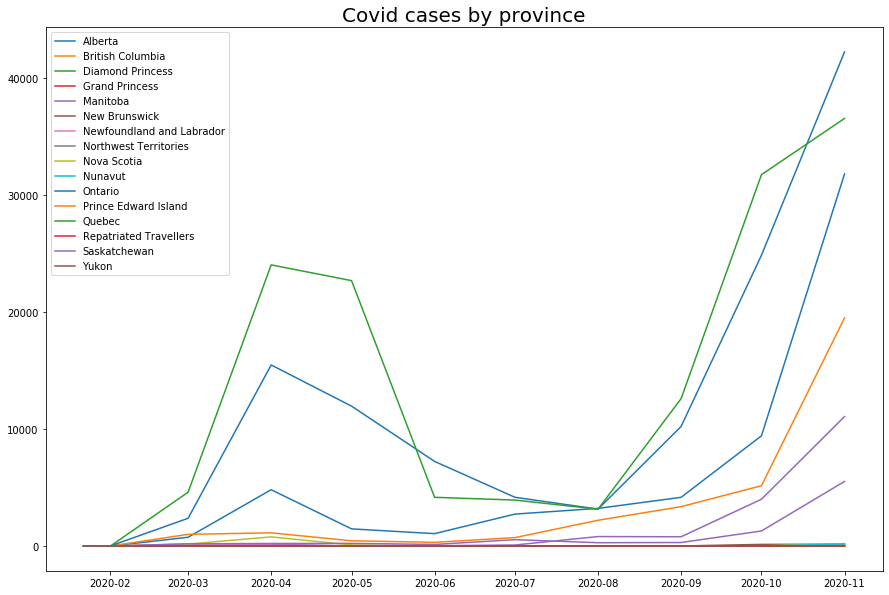

In [4]:
# Line chart visualization
fig,ax = plt.subplots(1,1,figsize=(15,10))
p = covid_monthly.index.get_level_values('Province/State').unique()
for x in p:
    covid_province = covid_monthly.groupby(covid_monthly.index.get_level_values('Province/State')).get_group(x)
    ax.plot(covid_province["Date"],covid_province["cases_increase"],label=x)
    ax.legend()
plt.title("Covid cases by province", fontsize=20)  
plt.show()

The above picture indicates that the number of Covid-19 cases increases dramatically in April of 2020, then it slows down during summer. However, the number of increasing cases explodes again from September until now.

## Part 2
I am going to make tables and line charts for both retail and wholesales data in this part. The data is downloaded from Statistic Canada.

In [5]:
# Load retail seasonally adjusted monthly data

retail = pd.read_csv("retail.csv", encoding = "ISO-8859-1")
retail = retail.drop(retail[retail["Adjustments"] == "Unadjusted"].index)

retail.head()

,REF_DATE,GEO,DGUID,North American Industry Classification System (NAICS),Adjustments,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
1,Sep-19,Canada,2016A000011124,Retail trade [44-45],Seasonally adjusted,Dollars,81,thousands,3,v52367097,1.1.2,51496503.0,A,NaN,NaN,0
3,Sep-19,Canada,2016A000011124,Motor vehicle and parts dealers [441],Seasonally adjusted,Dollars,81,thousands,3,v52367119,1.2.2,13941954.0,A,NaN,NaN,0
5,Sep-19,Canada,2016A000011124,Automobile dealers [4411],Seasonally adjusted,Dollars,81,thousands,3,v52367141,1.3.2,12183317.0,A,NaN,NaN,0
7,Sep-19,Canada,2016A000011124,New car dealers [44111],Seasonally adjusted,Dollars,81,thousands,3,v52367143,1.4.2,11147625.0,A,NaN,NaN,0
9,Sep-19,Canada,2016A000011124,Used car dealers [44112],Seasonally adjusted,Dollars,81,thousands,3,v52367145,1.5.2,1035692.0,A,NaN,NaN,0


E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


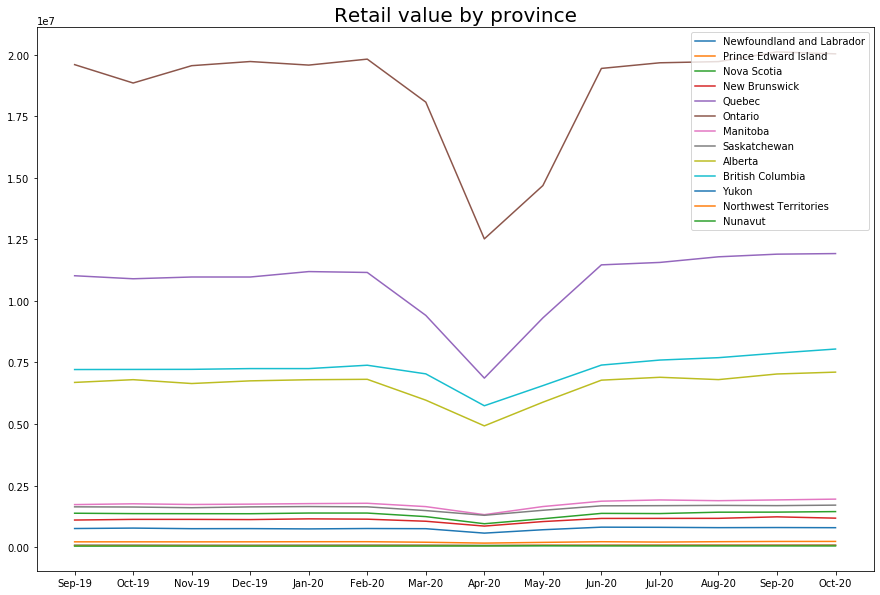

In [6]:
# Line chart visualization

fig,ax = plt.subplots(1,1,figsize=(15,10))

p =  ["Newfoundland and Labrador","Prince Edward Island","Nova Scotia","New Brunswick","Quebec","Ontario","Manitoba","Saskatchewan","Alberta","British Columbia","Yukon","Northwest Territories","Nunavut"]
for x in p:
    retail_province = retail.groupby("GEO").get_group(x)[retail["North American Industry Classification System (NAICS)"] == "Retail trade [44-45]"]
    ax.plot(retail_province["REF_DATE"],retail_province["VALUE"],label=x)
    ax.legend()
plt.title("Retail value by province", fontsize=20)  
plt.show()

In [7]:
# Load wholesales seasonally adjusted monthly data

wholesales = pd.read_csv("wholesales.csv", encoding = "ISO-8859-1")
wholesales = wholesales[wholesales["Sales, price and volume"] == "Wholesale sales at 2012 constant prices (Unchained Laspeyres Index)"]
wholesales.head()

,REF_DATE,GEO,DGUID,"Sales, price and volume",North American Industry Classification System (NAICS),UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
3,Sep-19,Canada,2016A000011124,Wholesale sales at 2012 constant prices (Uncha...,Wholesale trade [41],Dollars,81,millions,6,v120586540,1.4.1,59001.0,A,NaN,NaN,0
4,Sep-19,Canada,2016A000011124,Wholesale sales at 2012 constant prices (Uncha...,Farm product merchant wholesalers [411],Dollars,81,millions,6,v120848108,1.4.2,1119.0,A,NaN,NaN,0
5,Sep-19,Canada,2016A000011124,Wholesale sales at 2012 constant prices (Uncha...,"Food, beverage and tobacco merchant wholesaler...",Dollars,81,millions,6,v120848109,1.4.3,9848.0,A,NaN,NaN,0
6,Sep-19,Canada,2016A000011124,Wholesale sales at 2012 constant prices (Uncha...,Food merchant wholesalers [4131],Dollars,81,millions,6,v120848110,1.4.4,8745.0,A,NaN,NaN,0
7,Sep-19,Canada,2016A000011124,Wholesale sales at 2012 constant prices (Uncha...,Beverage merchant wholesalers [4132],Dollars,81,millions,6,v120848111,1.4.5,666.0,A,NaN,NaN,0


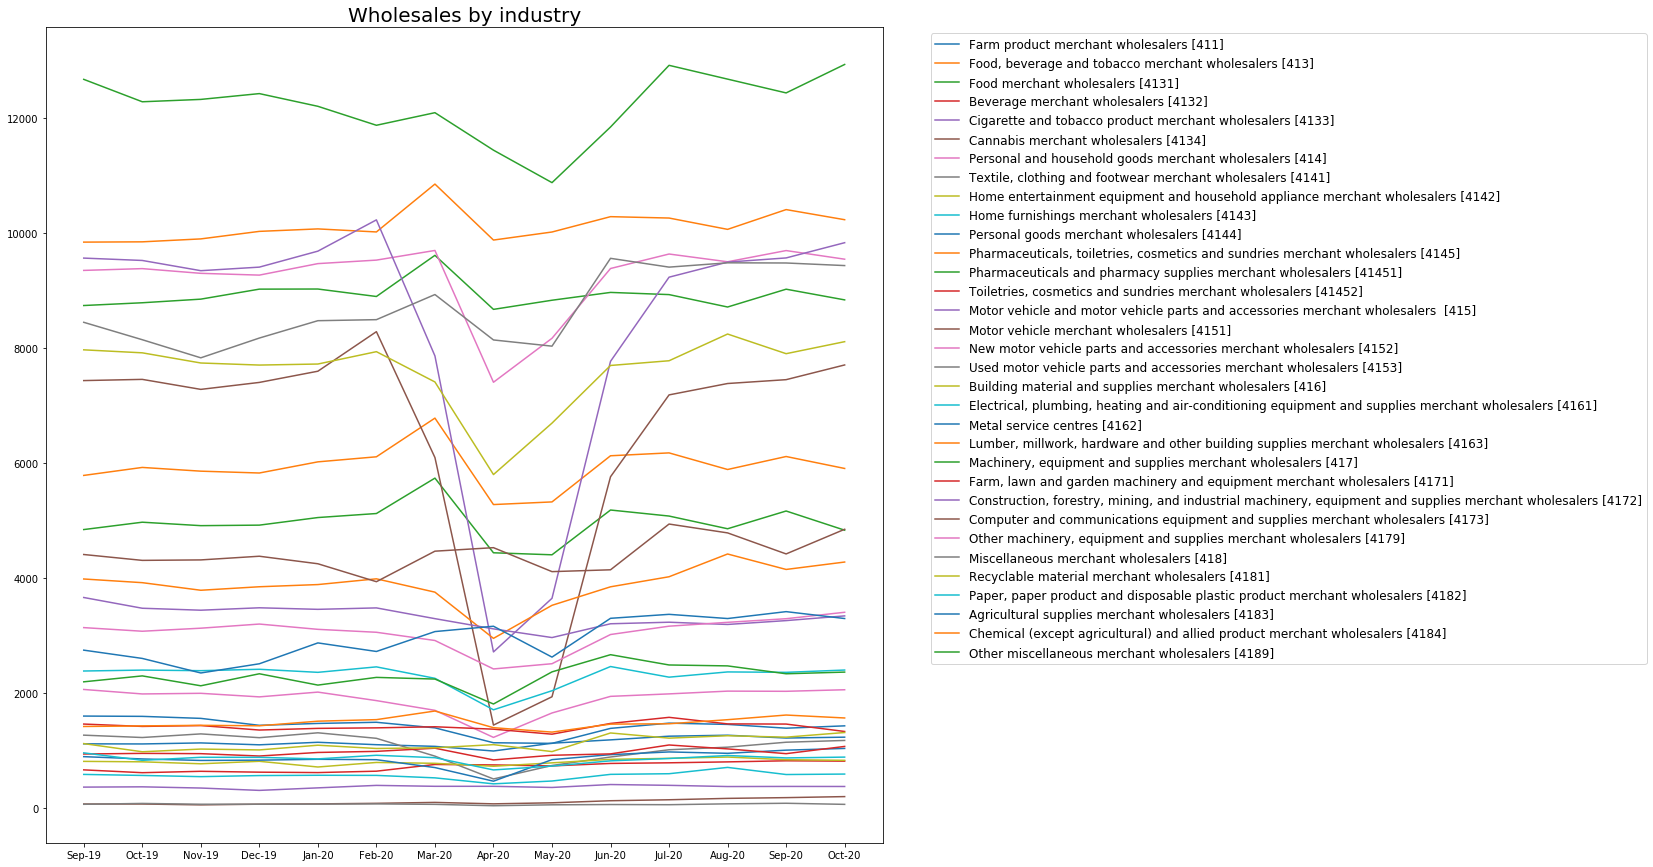

In [8]:
# Line chart visualization

fig,ax = plt.subplots(1,1,figsize=(15,15))

p = wholesales["North American Industry Classification System (NAICS)"].unique()
for x in p:
    if x == "Wholesale trade [41]":
        continue
    wholesales_categories = wholesales[wholesales["North American Industry Classification System (NAICS)"] == x]
    ax.plot(wholesales_categories["REF_DATE"],wholesales_categories["VALUE"],label=x)
    ax.legend(bbox_to_anchor=(1.05, 1),loc='upper left',fontsize='large')
plt.title("Wholesales by industry", fontsize=20)
plt.show()

As the above charts showing, retail and wholesales value dropped a lot during April.

## Part 3
First, I will combine Canada country-wide wholesales data and Covid-19 cases to one table base on date.

In [9]:
# Get Canada coutry-wide covid cases increases from 2020-01 to 2020-10 as independent variable
covid_cases_increase = covid_monthly.groupby(covid_monthly.index.get_level_values('Date'))["cases_increase"].sum()[:-2]

# Get Canada coutry-wide wholesales value from 2019-09 to 2020-10 as dependent variable
agg_wholesale = wholesales[wholesales["North American Industry Classification System (NAICS)"] == "Wholesale trade [41]"]
agg_wholesale = agg_wholesale.rename(columns = {'REF_DATE':'Date', "VALUE":"Wholesale_Value"})
agg_wholesale["Date"]= pd.to_datetime(agg_wholesale["Date"], format='%b-%y').dt.to_period('M')
agg_wholesale = agg_wholesale.set_index("Date")["Wholesale_Value"]

# Combine two tables
covid_wholesale = agg_wholesale.to_frame().join(covid_cases_increase)
covid_wholesale['cases_increase'] = covid_wholesale['cases_increase'].fillna(0)
covid_wholesale

,Wholesale_Value,cases_increase
Date,,
2019-09,59001.0,0.0
2019-10,58247.0,0.0
2019-11,57606.0,0.0
2019-12,58142.0,0.0
2020-01,58807.0,4.0
2020-02,59222.0,20.0
2020-03,57955.0,9536.0
2020-04,46403.0,46783.0
2020-05,48599.0,36945.0


The next step is to run a linear regression and check the result in the following steps.

Coefficient: [-0.05288862]
Intercept: 58414.407482354065


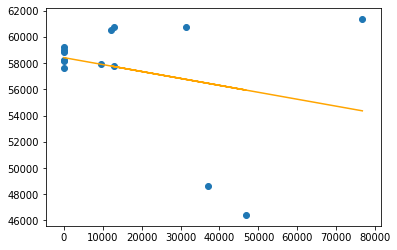

                            OLS Regression Results                            
Dep. Variable:        Wholesale_Value   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.9805
Date:                Mon, 21 Dec 2020   Prob (F-statistic):              0.342
Time:                        21:08:28   Log-Likelihood:                -136.36
No. Observations:                  14   AIC:                             276.7
Df Residuals:                      12   BIC:                             278.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.841e+04   1497.704     39.003      0.0

E:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


In [10]:
# Generate OLS linear regression model

def OLS_model(X, Y):
    
    # Fit a linear regression model to the data
    model = linear_model.LinearRegression()
    model.fit(X, Y)
    predicted = model.predict(X)

    # Summarize the fit of the model
    print("Coefficient:", model.coef_)
    print("Intercept:", model.intercept_)

    # For a better-look summary
    x = sm.add_constant(X)
    mod = sm.OLS(Y, x).fit()
    predictions = mod.predict(x)

    # Visualization
    plt.plot(X, predictions, color="orange")
    plt.scatter(X, Y)
    plt.show()

    # model summary
    print(mod.summary())

X = np.array(covid_wholesale["cases_increase"]).reshape(-1,1)
Y = covid_wholesale["Wholesale_Value"]
OLS_model(X, Y)

## Part 4

The above OLS regresssion result shows that the number of cases has a negative effect on wholesales value in Canada. In this part, I will pick three different kind of industries and run the regression again. So we can find out how different industries can be influenced by Covid-19.

The first part is Computer and communications equipment and supplies merchant wholesalers. During the pandemic, many people have to start working from home, so my hypothesis is that the number of cases has a positive effect on Computer and communications equipment and supplies merchant wholesale value.

Coefficient: [0.00508596]
Intercept: 4333.653877390518


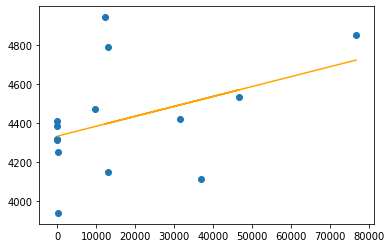

                            OLS Regression Results                            
Dep. Variable:                  VALUE   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     2.429
Date:                Mon, 21 Dec 2020   Prob (F-statistic):              0.145
Time:                        21:08:29   Log-Likelihood:                -97.225
No. Observations:                  14   AIC:                             198.5
Df Residuals:                      12   BIC:                             199.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4333.6539     91.506     47.359      0.0

E:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


In [11]:
# The influence of covid cases on computer wholesales
X = np.array(covid_wholesale["cases_increase"]).reshape(-1,1)
computer_wholesale = wholesales[wholesales["North American Industry Classification System (NAICS)"] == "Computer and communications equipment and supplies merchant wholesalers [4173]"]
Y = computer_wholesale["VALUE"]
OLS_model(X, Y)

From the regression, the influence of Covid-19 on Computer and communications equipment and supplies merchant wholesalers is positive, which matches the expectation.

The second industry I pick is Motor vehicle merchant wholesalers. The hypothesis is that COVID-19 has a negative effect on motor vehivle merchant wholesalers since there is less motivation for people to go outside, thus the need for motor vehicle decreases.

Coefficient: [-0.03859042]
Intercept: 7123.225409941317


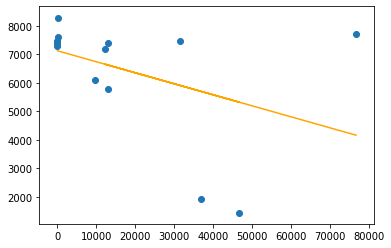

                            OLS Regression Results                            
Dep. Variable:                  VALUE   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     2.568
Date:                Mon, 21 Dec 2020   Prob (F-statistic):              0.135
Time:                        21:08:29   Log-Likelihood:                -125.21
No. Observations:                  14   AIC:                             254.4
Df Residuals:                      12   BIC:                             255.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7123.2254    675.317     10.548      0.0

E:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


In [12]:
# The influence of covid cases on motor vehicle wholesales
X = np.array(covid_wholesale["cases_increase"]).reshape(-1,1)
computer_wholesale = wholesales[wholesales["North American Industry Classification System (NAICS)"] == "Motor vehicle merchant wholesalers [4151]"]
Y = computer_wholesale["VALUE"]
OLS_model(X, Y)

From the regression, the influence of Covid-19 on Motor vehicle merchant wholesalers is nagative. People stop going outside to keep social distance, so the damand of vehicles also decrease.

The third industry I pick is Textile, clothing and footwear merchant wholesalers. Since the social activities are highly impacted because of pandemic and lockdown, my guess is that people have less need for clothing. 

Coefficient: [-0.0047142]
Intercept: 1151.4109454423312


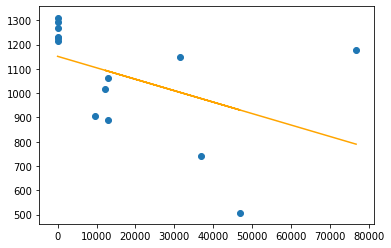

                            OLS Regression Results                            
Dep. Variable:                  VALUE   R-squared:                       0.213
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     3.241
Date:                Mon, 21 Dec 2020   Prob (F-statistic):             0.0970
Time:                        21:08:29   Log-Likelihood:                -94.143
No. Observations:                  14   AIC:                             192.3
Df Residuals:                      12   BIC:                             193.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1151.4109     73.423     15.682      0.0

E:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


In [13]:
# The influence of covid cases on textile, clothing and footwear wholesales
X = np.array(covid_wholesale["cases_increase"]).reshape(-1,1)
computer_wholesale = wholesales[wholesales["North American Industry Classification System (NAICS)"] == "Textile, clothing and footwear merchant wholesalers [4141]"]
Y = computer_wholesale["VALUE"]
OLS_model(X, Y)

The regression shows that the influence of Covid-19 on Motor vehicle merchant wholesalers is negative as expected. 

## Part 5
In this part, I will combine province-level retail sales data and Covid-19 cases to one table. Then use this panel data to run a fix-effect linear regression.

In [14]:
# Get Canada province-level covid cases increases from 2020-01 to 2020-10 as independent variable
covid_cases_increase_province = covid_monthly["cases_increase"]

# Get Canada province-level retail value from 2019-09 to 2020-10 as dependent variable
agg_retail = retail[retail["North American Industry Classification System (NAICS)"] == "Retail trade [44-45]"]
agg_retail = agg_retail.rename(columns = {'REF_DATE':'Date', "GEO":"Province/State", "VALUE":"Retail_Value"})
agg_retail["Date"]= pd.to_datetime(agg_retail["Date"], format='%b-%y').dt.to_period('M')
agg_retail = agg_retail.groupby(["Province/State","Date"]).nth(0)["Retail_Value"]

# Combine these two tables and fill the blank
provinces =  ["Newfoundland and Labrador","Prince Edward Island","Nova Scotia","New Brunswick","Quebec","Ontario","Manitoba","Saskatchewan","Alberta","British Columbia","Yukon","Northwest Territories","Nunavut"]
covid_retail = agg_retail.to_frame().join(covid_cases_increase_province)
covid_retail = covid_retail[covid_retail.index.get_level_values("Province/State").isin(provinces)]
covid_retail['cases_increase'] = covid_retail['cases_increase'].fillna(0)
covid_retail["Retail_Value"] = covid_retail["Retail_Value"]/1000
covid_retail.head()

Retail_Value  cases_increase
Province/State Date                                 
Alberta        2019-09      6688.722             0.0
               2019-10      6800.254             0.0
               2019-11      6643.761             0.0
               2019-12      6752.116             0.0
               2020-01      6798.106            -0.0

In [15]:
!pip install linearmodels
from linearmodels import PanelOLS

# Create panel OLS model
covid_retail.index = covid_retail.index.set_levels(covid_retail.index.levels[1].astype('datetime64[ns]'), level=1)
X = covid_retail["cases_increase"]
X = sm.add_constant(X)
Y = covid_retail["Retail_Value"]
mod = PanelOLS(Y, X, entity_effects=True)
res = mod.fit(cov_type='clustered', cluster_entity=True)
print(res)

                          PanelOLS Estimation Summary                           
Dep. Variable:           Retail_Value   R-squared:                        0.0914
Estimator:                   PanelOLS   R-squared (Between):             -0.0480
No. Observations:                 182   R-squared (Within):               0.0914
Date:                Mon, Dec 21 2020   R-squared (Overall):             -0.0454
Time:                        21:08:32   Log-likelihood                   -1452.0
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      16.893
Entities:                          17   P-value                           0.0001
Avg Obs:                       10.706   Distribution:                   F(1,168)
Min Obs:                       0.0000                                           
Max Obs:                       14.000   F-statistic (robust):             11.049
                            

E:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


The result shows that the Covid-19 has a significant negative influence on retail value. Every thousand cases increase will result in around $61700 drop at retail value.

## Part 6 
In this part, I will put festival as an independent dummy variable into the regression model to see if retail value is influenced when there is a festival in that month. Since we have Easter, Thanksgiving and Christmas at April, October and December respectively, so I set these months as festival months.

In [16]:
# Add festival dummy variable
covid_retail["festival"] = 0
covid_retail.loc[covid_retail.index.get_level_values("Date").month.isin([4,10,12]),"festival"] = 1

covid_retail.head()

Retail_Value  cases_increase  festival
Province/State Date                                              
Alberta        2019-09-01      6688.722             0.0         0
               2019-10-01      6800.254             0.0         1
               2019-11-01      6643.761             0.0         0
               2019-12-01      6752.116             0.0         1
               2020-01-01      6798.106            -0.0         0

In [17]:
from linearmodels import PooledOLS

exog = ["cases_increase","festival"]
X = sm.add_constant(covid_retail[exog])
Y = covid_retail["Retail_Value"]
mod = PanelOLS(Y, X)
res = mod.fit()
print(res)

                          PanelOLS Estimation Summary                           
Dep. Variable:           Retail_Value   R-squared:                        0.1976
Estimator:                   PanelOLS   R-squared (Between):              0.3692
No. Observations:                 182   R-squared (Within):              -8.8460
Date:                Mon, Dec 21 2020   R-squared (Overall):              0.1976
Time:                        21:08:32   Log-likelihood                   -1803.2
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      22.046
Entities:                          17   P-value                           0.0000
Avg Obs:                       10.706   Distribution:                   F(2,179)
Min Obs:                       0.0000                                           
Max Obs:                       14.000   F-statistic (robust):             22.046
                            

The result does not match what I expected. There are two possible explanations for this:

1.From the line chart of retail value in part 2, we can see that there is no significant increase at April, October and December. So maybe for this year, people reduces the unnecessary expenditure during the pandemic.

2.Since only two independent variables are selected in this model, there may exist omitted variables.

## Conclusion

Overall, the number of COVID-19 confirmed cases has a negative influence on retail and wholesales value in 2020, while for some industries like computer and communications equipment and supplies, it has a positive impact. The results indicate that COVID-19 and the pandemic during 2020 does affect people's consuming activities, and also the components of expenditure.